# Uploading data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


# Reading the excel file
# Part a-1
*   use of info() and describe() functions




In [2]:
import pandas as pd
import numpy as np

diabetes_data = pd.read_csv('diabetes.csv')
print(f"\nInformation about the Data (Using info()):\n{diabetes_data.info(verbose=True)}\n")
# Making a copy set of the data for later use
diabetes_data_copy = diabetes_data.copy()
print(diabetes_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB

Information about the Data (Using info()):
None

       Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count   635.000000   654.000000     680.000000     624.000000  680.000000   
mean      3.700787   113.422018     

# Part a-2
*   Number of Missing values and the portion of missing values in each column(feature)

In [3]:
NaN_count = diabetes_data.isnull().sum()
print(f"Number of NaN values in each column:\n{NaN_count}\n")
nan_percentage = (NaN_count / len(diabetes_data)) * 100
print(f'\n NaN percentage per feature:\n',nan_percentage)



Number of NaN values in each column:
Pregnancies                 133
Glucose                     114
BloodPressure                88
SkinThickness               144
Insulin                      88
BMI                          84
DiabetesPedigreeFunction    178
Age                         113
Outcome                       0
dtype: int64


 NaN percentage per feature:
 Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64


*   Printing the mean and median values of each column

In [4]:
d = {'Median': diabetes_data.median(), 'Mean': diabetes_data.mean()}
df = pd.DataFrame(data=d)
df

,Median,Mean
Pregnancies,3.000,3.700787
Glucose,117.000,113.422018
BloodPressure,72.000,68.786765
SkinThickness,23.000,20.386218
Insulin,34.000,80.123529
BMI,32.300,32.083626
DiabetesPedigreeFunction,0.368,0.466676
Age,29.000,33.157252
Outcome,0.000,0.348958


# Part a-3 Correlation
*   A Heatmap of the correlation among the features and the Outcome is plotted.


(9, 9)
<class 'pandas.core.frame.DataFrame'>


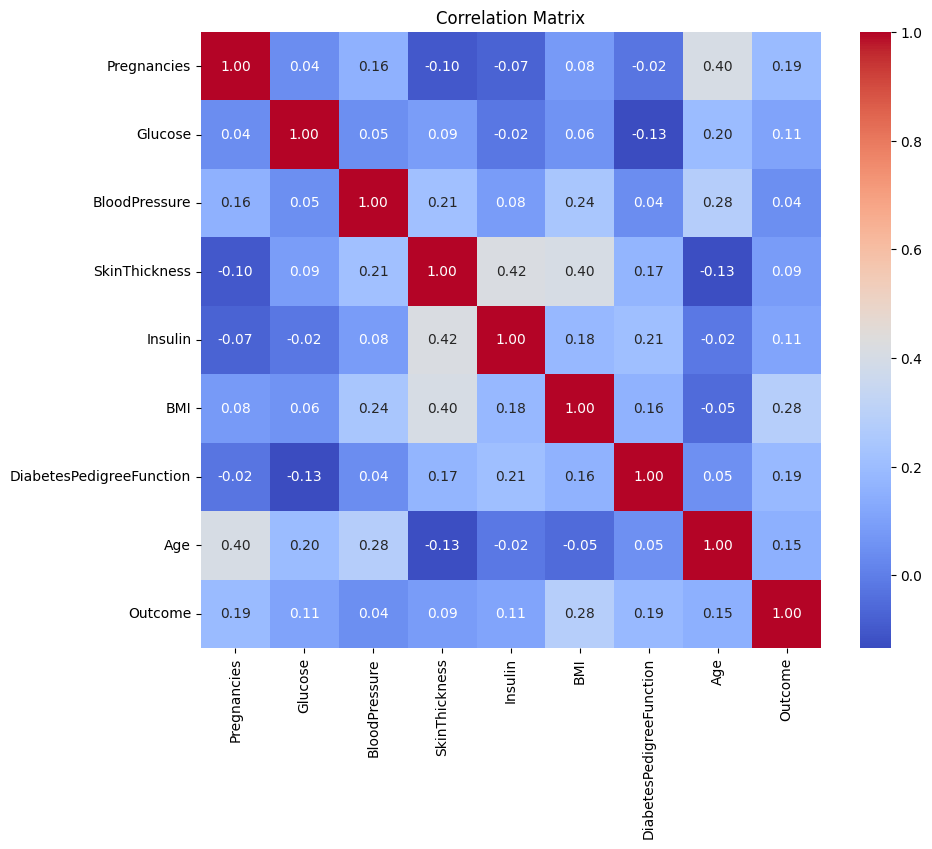

In [5]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation among the features and price
correlation_results = diabetes_data.corr()
print(correlation_results.shape)
print(type(correlation_results))
correlation_results
# Plotting Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Part a-4
*   First, the features with correlation less than -0.15 or more than 0.15 are harvested. In the end the data spread of these features is plotted.

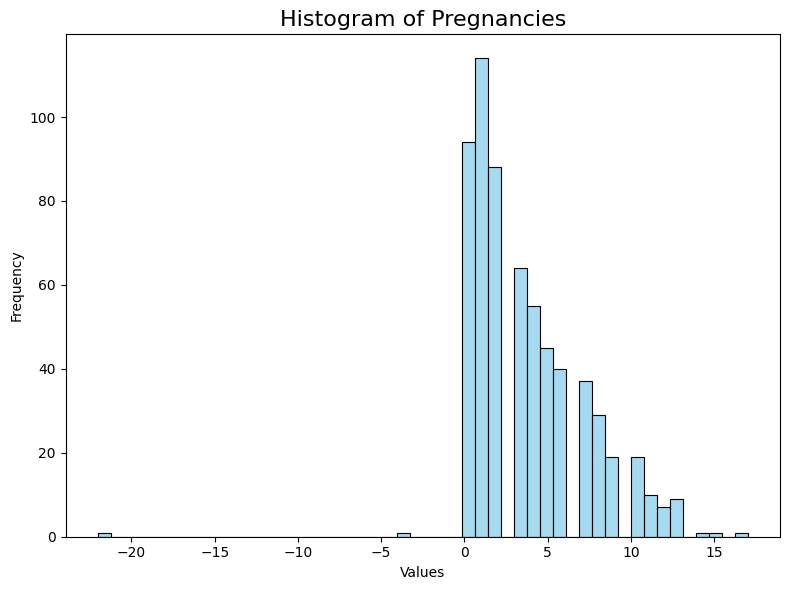

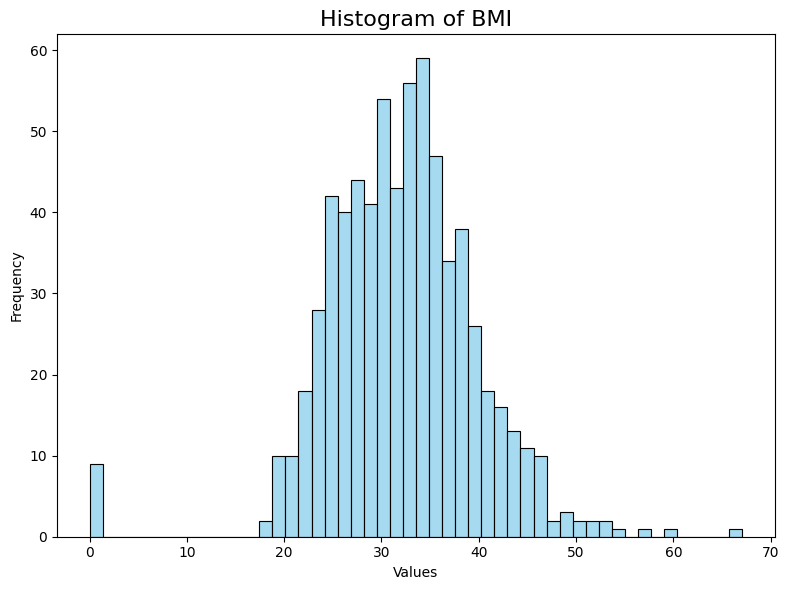

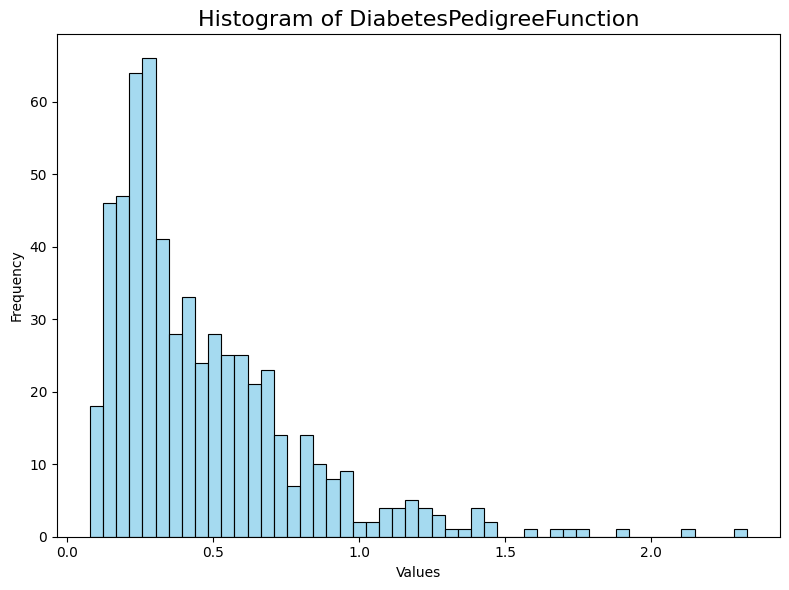

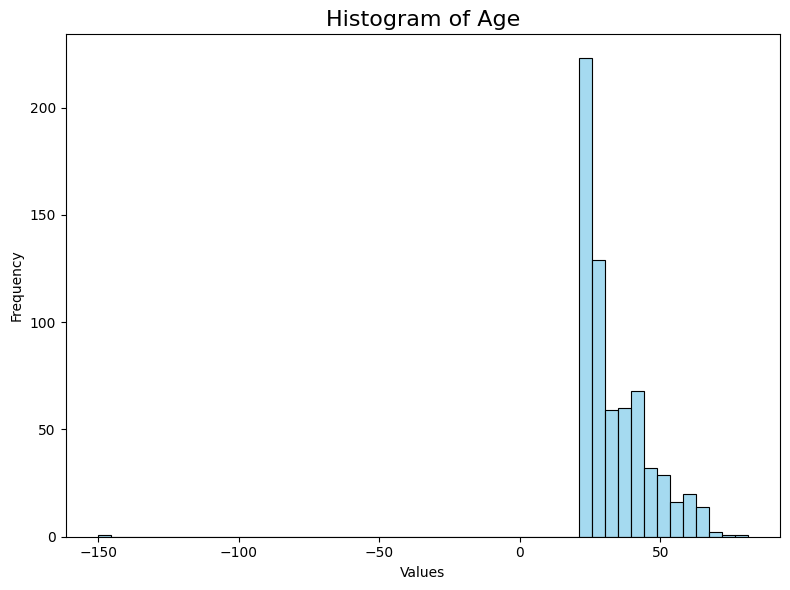

In [6]:
# Seperating Features and Outcome from the data
construct_features = diabetes_data.drop(['Outcome'], axis=1)
Outcome = diabetes_data['Outcome']
correlation_results = construct_features.corrwith(Outcome)
# Setting the threshold
diabetes_data_top = correlation_results[(correlation_results < -0.15) | (correlation_results > 0.15)]
index_labels = pd.Series(diabetes_data_top.index.astype(str))

# Plotting histograms for each feature seperately
for col in index_labels:
    plt.figure(figsize=(8, 6))
    sns.histplot(diabetes_data[col], bins=50, color='skyblue', edgecolor='black', kde=False)
    plt.title(f'Histogram of {col}', fontsize=16)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Part a-5 Hexbin and Scatter plots

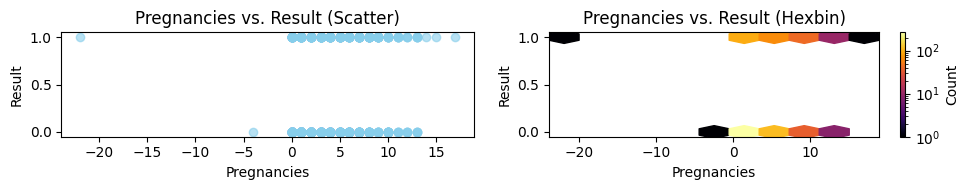

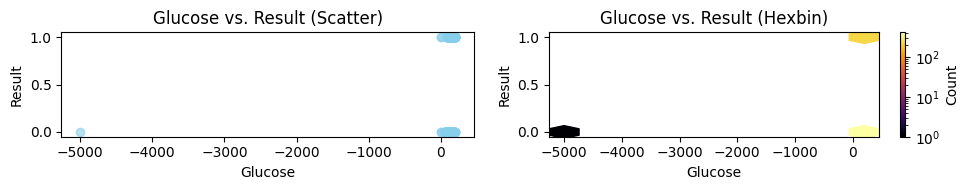

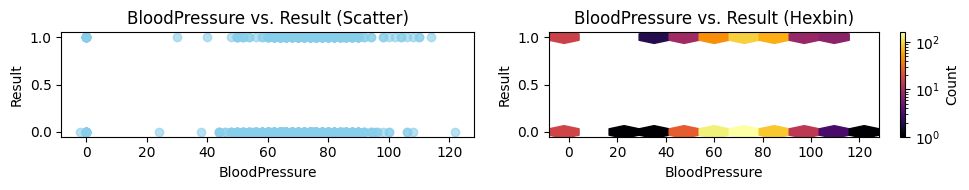

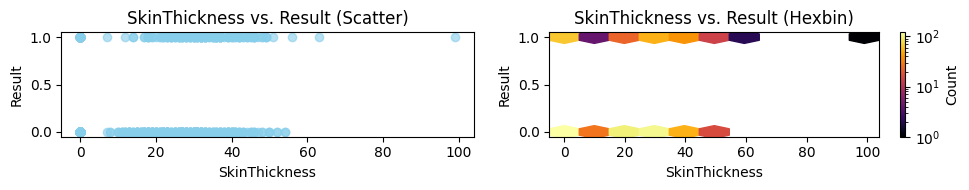

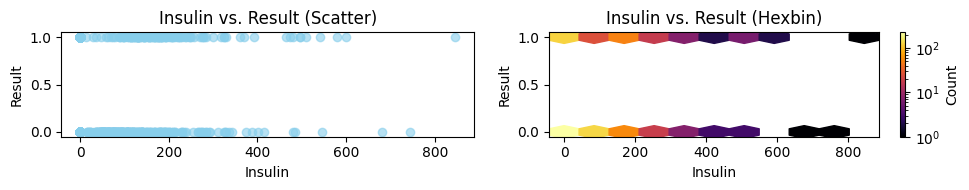

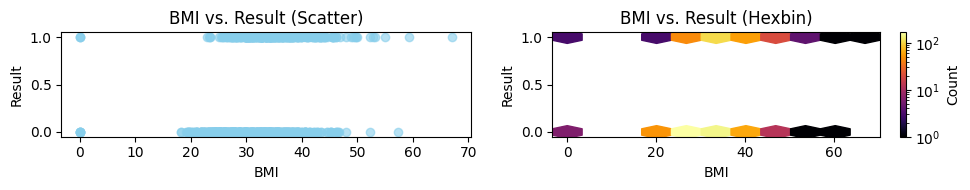

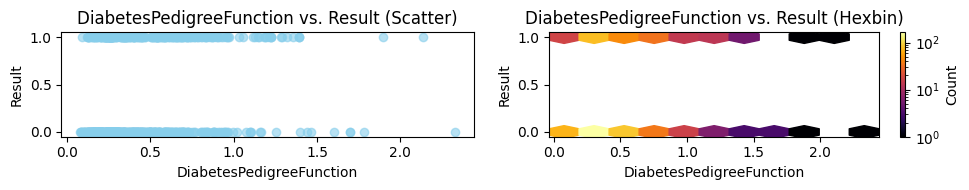

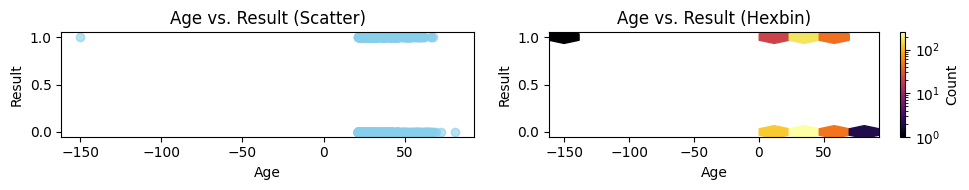

In [7]:
import matplotlib.pyplot as plt

# Plotting the Hexbin and Scatter plots for each feature along with the Outcome
# Dropping the Outcome since Outcome to Outcome Scatter and Hexbin is useless
feature_columns = diabetes_data.drop(['Outcome'], axis=1)
for feature in feature_columns:
    plt.figure(figsize=(10, 2))
    # Scatter
    plt.subplot(1, 2, 1)
    plt.scatter(diabetes_data[feature], diabetes_data['Outcome'], color='skyblue', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Result')
    plt.title(f'{feature} vs. Result (Scatter)')
    # Hexbin
    plt.subplot(1, 2, 2)
    plt.hexbin(diabetes_data[feature], diabetes_data['Outcome'], gridsize=10, bins='log', cmap='inferno')
    plt.xlabel(feature)
    plt.ylabel('Result')
    plt.title(f'{feature} vs. Result (Hexbin)')
    plt.colorbar(label='Count')

    plt.tight_layout()
    plt.show()

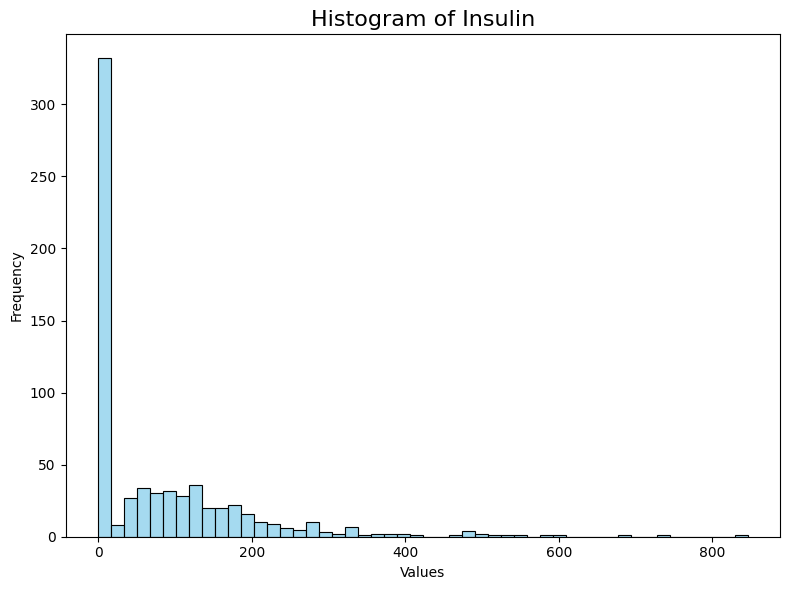

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(diabetes_data['Insulin'], bins=50, color='skyblue', edgecolor='black', kde=False)
plt.title(f'Histogram of Insulin', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pre-processing
*   The negative and zero values are converted to NaN values
*   Later all Nan values are replaced by their columns median value.

In [9]:
Pregnancies_data = diabetes_data['Pregnancies']
diabetes_data_p1 = diabetes_data.drop(['Outcome','Pregnancies'], axis=1)

# Selecting the data which are equal or smaller than 0
diabetes_data_p1[diabetes_data_p1 <= 0] = np.nan
# Selecting negative values for pregnancies
Pregnancies_data[Pregnancies_data < 0] = np.nan


diabetes_data_p1 = pd.concat([diabetes_data_p1, Pregnancies_data], axis=1)
# Droping columns
# diabetes_data_p1 = diabetes_data_p1.drop(['SkinThickness','DiabetesPedigreeFunction'], axis=1)
diabetes_data_p1 = diabetes_data_p1.drop(['SkinThickness','Insulin'], axis=1)

column_medians = diabetes_data_p1.median()

# Replace NaN values in each column with the respective column median
diabetes_data_p1 = diabetes_data_p1.fillna(column_medians)

# Print the number of NaN values in each column after imputation
print(diabetes_data_p1.isna().sum())

# NaN_count = diabetes_data_p1.isnull().sum()
# print(NaN_count)

diabetes_data_p1.head(5)

Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
dtype: int64


<ipython-input-9-bfc2f59e19f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pregnancies_data[Pregnancies_data < 0] = np.nan


,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,148.0,72.0,33.6,0.627,50.0,6.0
1,85.0,66.0,26.6,0.351,31.0,1.0
2,183.0,64.0,23.3,0.672,32.0,3.0
3,89.0,66.0,28.1,0.167,21.0,1.0
4,137.0,40.0,32.4,0.368,33.0,3.0


# implementing Normalization or Standardization




*   either can be run after the pre-processing step
*   there is an option to run neither of them as well



Standardization

In [10]:
from sklearn.preprocessing import StandardScaler
#Normalizing function
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_data_p1)
#Create a DataFrame with the normalized data
diabetes_data_p1 = pd.DataFrame(scaled_features, columns=diabetes_data_p1.columns)
diabetes_data_p1.head(5)

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.944515,-0.022047,0.170269,0.641885,1.561614,0.777556
1,-1.277896,-0.548422,-0.911215,-0.325179,-0.161286,-0.856716
2,2.179188,-0.723881,-1.421057,0.799558,-0.070607,-0.203007
3,-1.136790,-0.548422,-0.679468,-0.969888,-1.068075,-0.856716
4,0.556475,-2.829385,-0.015128,-0.265613,0.020072,-0.203007


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalizing function
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(diabetes_data_p1)
# Create a DataFrame with the normalized data
diabetes_data_p1 = pd.DataFrame(normalized_data, columns=diabetes_data_p1.columns)

diabetes_data_p1.head(5)

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.670968,0.489796,0.314928,0.243892,0.483333,0.352941
1,0.264516,0.428571,0.171779,0.121279,0.166667,0.058824
2,0.896774,0.408163,0.104294,0.263883,0.183333,0.176471
3,0.290323,0.428571,0.202454,0.039538,0.000000,0.058824
4,0.600000,0.163265,0.290389,0.128832,0.200000,0.176471


# Part c-1 Implementation of the Machine Learning models
*   Splitting the data to train and test

In [11]:
from sklearn.model_selection import train_test_split

# diabetes_Features = diabetes_data.drop(['Outcome'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_data_p1, diabetes_data['Outcome'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
# X_train

((614, 6), (154, 6), (614,), (154,))

*   Training the models

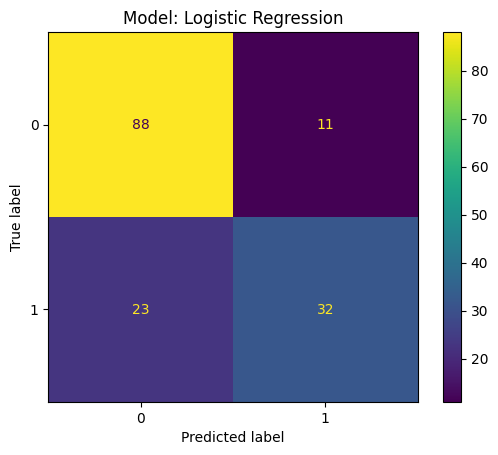

Model: Logistic Regression
Confusion Matrix:
[[88 11]
 [23 32]]
Accuracy: 0.7792207792207793



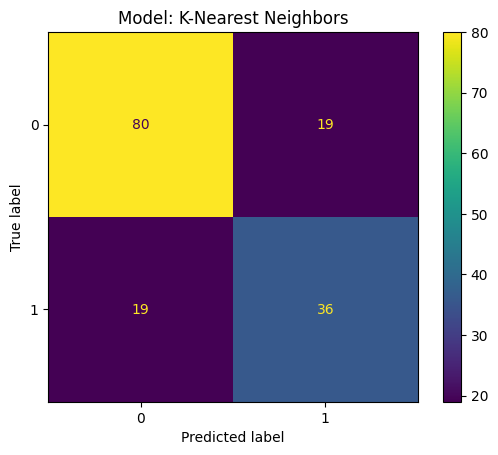

Model: K-Nearest Neighbors
Confusion Matrix:
[[80 19]
 [19 36]]
Accuracy: 0.7532467532467533



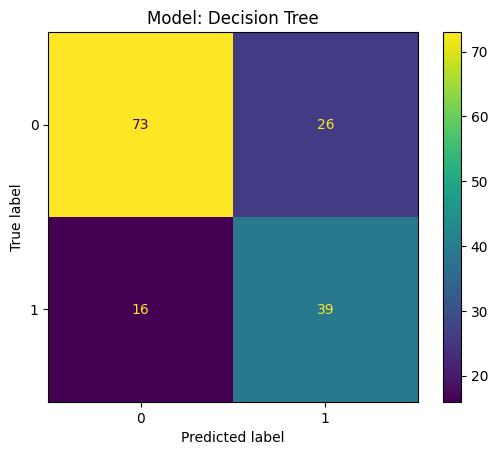

Model: Decision Tree
Confusion Matrix:
[[73 26]
 [16 39]]
Accuracy: 0.7272727272727273



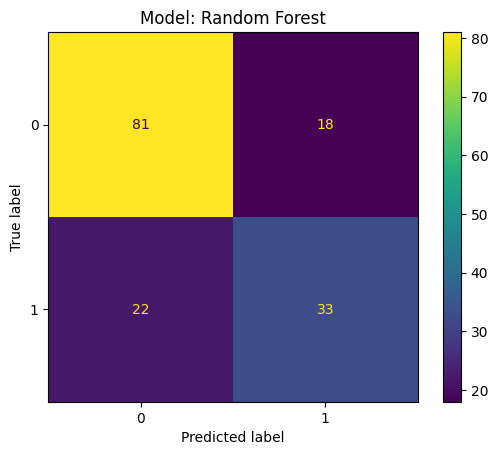

Model: Random Forest
Confusion Matrix:
[[81 18]
 [22 33]]
Accuracy: 0.7402597402597403



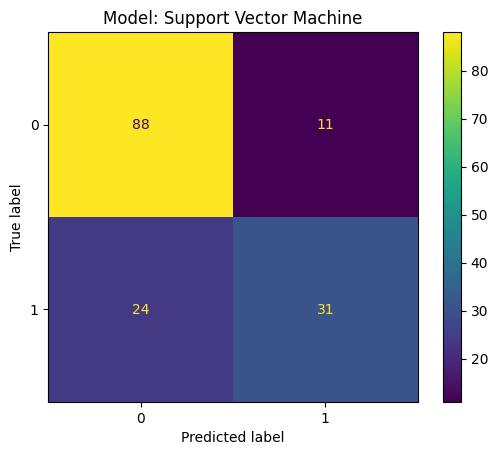

Model: Support Vector Machine
Confusion Matrix:
[[88 11]
 [24 31]]
Accuracy: 0.7727272727272727



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Training each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    cm = confusion_matrix(Y_test, Y_pred)

    # Plotting confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f"Model: {name}")
    plt.show()
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print()


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Hyperparameters
param_grid = {
    "Logistic Regression": {'max_iter': [10, 100, 250], 'C': [0.1, 1.0]},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "Decision Tree": {'max_depth': [3, 5, 7], 'min_samples_split' : [2,3,4,5,6]},
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [5, 10]},
    "Support Vector Machine": {'C': [0.1, 1.0], 'kernel': ['linear', 'rbf', 'poly' ]}
}


# Training each model with GridSearchCV
for name, model in models.items():
    # GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')

    # Using GridSearchCV on the training set
    grid_search.fit(X_train, Y_train)

    # Predictions on training set
    Y_train_pred = grid_search.predict(X_train)

    # Predictions on testing set
    Y_test_pred = grid_search.predict(X_test)

    # Confusion matrix and accuracy on training set
    cm_train = confusion_matrix(Y_train, Y_train_pred)
    accuracy_train = accuracy_score(Y_train, Y_train_pred)

    # Confusion matrix and accuracy on testing set
    cm_test = confusion_matrix(Y_test, Y_test_pred)
    accuracy_test = accuracy_score(Y_test, Y_test_pred)

    print(f"Model: {name}")
    print("Training Set - Confusion Matrix:")
    print(cm_train)
    print("Training Set - Accuracy:", accuracy_train)
    print("Test Set - Confusion Matrix:")
    print(cm_test)
    print("Test Set - Accuracy:", accuracy_test)
    print("Best Parameters:", grid_search.best_params_)
    print()

Model: Logistic Regression
Training Set - Confusion Matrix:
[[354  47]
 [ 98 115]]
Training Set - Accuracy: 0.7638436482084691
Test Set - Confusion Matrix:
[[88 11]
 [23 32]]
Test Set - Accuracy: 0.7792207792207793
Best Parameters: {'C': 1.0, 'max_iter': 10}

Model: K-Nearest Neighbors
Training Set - Confusion Matrix:
[[360  41]
 [ 71 142]]
Training Set - Accuracy: 0.8175895765472313
Test Set - Confusion Matrix:
[[80 19]
 [19 36]]
Test Set - Accuracy: 0.7532467532467533
Best Parameters: {'n_neighbors': 5}

Model: Decision Tree
Training Set - Confusion Matrix:
[[391  10]
 [140  73]]
Training Set - Accuracy: 0.755700325732899
Test Set - Confusion Matrix:
[[95  4]
 [38 17]]
Test Set - Accuracy: 0.7272727272727273
Best Parameters: {'max_depth': 3, 'min_samples_split': 2}

Model: Random Forest
Training Set - Confusion Matrix:
[[401   0]
 [ 12 201]]
Training Set - Accuracy: 0.9804560260586319
Test Set - Confusion Matrix:
[[81 18]
 [19 36]]
Test Set - Accuracy: 0.7597402597402597
Best Paramet